#**Case**
Pak Jonan adalah investor yang memiliki fokus pada investasi di bidang saham. Namun saat ini, dia memiliki waktu yang sedikit untuk menganalisis semua saham yang ada dikarenakan kesibukannya sebagai menteri. Sebagai seorang machine learning engineer, apa yang akan kalian lakukan supaya dapat memberikan rekomendasi harga saham kepada Pak Jonan?

# Data Preparation

## Data Loading

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/shofiaikhromi/final-project/main/Copy%20of%20TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/30/2010,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,7/1/2010,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,7/2/2010,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,7/6/2010,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,7/7/2010,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,9/21/2020,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,9/22/2020,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,9/23/2020,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,9/24/2020,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


##Data Understanding

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/30/2010,5.158,6.084,4.660,4.766,4.766,85935500
1,7/1/2010,5.000,5.184,4.054,4.392,4.392,41094000
2,7/2/2010,4.600,4.620,3.742,3.840,3.840,25699000
3,7/6/2010,4.000,4.000,3.166,3.222,3.222,34334500
4,7/7/2010,3.280,3.326,2.996,3.160,3.160,34608500


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2574,9/21/2020,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,9/22/2020,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,9/23/2020,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,9/24/2020,363.799988,399.500000,351.299988,387.790009,387.790009,96561100
2578,9/25/2020,393.470001,408.730011,391.299988,407.339996,407.339996,67068400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


**Deskripsi Data**

1. **Date** = Merupakan tanggal dimana saham diperdagangkan di pasar saham.
2. **Open** = Mewakili harga pembukaan saham pada tanggal tertentu. Ini adalah harga di mana suatu saham mulai
3. **High** = adalah harga tertinggi suatu saham diperdagangkan selama suatu periode. Di sini periodenya adalah satu hari.
4. **Low** = adalah harga terendah di mana suatu saham diperdagangkan selama suatu periode. Di sini periodenya adalah satu hari.
5. **Close** = Merupakan harga penutupan saham pada tanggal tertentu. Ini adalah pesanan beli-jual terakhir yang dieksekusi di antara keduanya
6. **Adj Close** = Harga penutupan yang disesuaikan mengubah harga penutupan saham untuk mencerminkan nilai saham tersebut setelah memperhitungkannya
7. **Volume** = adalah jumlah saham sekuritas yang diperdagangkan selama periode waktu tertentu. Di sini sekuritasnya adalah stok dan jangka waktu

In [ ]:
#mau melihat data yg unik
df.nunique()

Date         2579
Open         2294
High         2288
Low          2297
Close        2389
Adj Close    2389
Volume       2553
dtype: int64

In [ ]:
df.shape

(2579, 7)

Dataset terdiri dari 2579 baris dan 7 kolom

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


##Data Checking

In [ ]:
#memeriksa missing value
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**output** diatas menunjukkan bahwa  tidak ada data yg NaN dalam dataset

In [ ]:
#memeriksa data duplikat
df.duplicated().sum()

0

Output diatas menunjukkan bahwa data tidak ada yg duplikat dalam dataset

In [ ]:
#memeriksa format tanggal
date_format_correct = pd.to_datetime(df['Date'], errors='coerce').notnull().all()

if date_format_correct :
    print("Format tanggal dalam dataset sesuai.")
else:
    print("Ada nilai yang tidak sesuai format tanggal dalam dataset.")

Format tanggal dalam dataset sesuai.


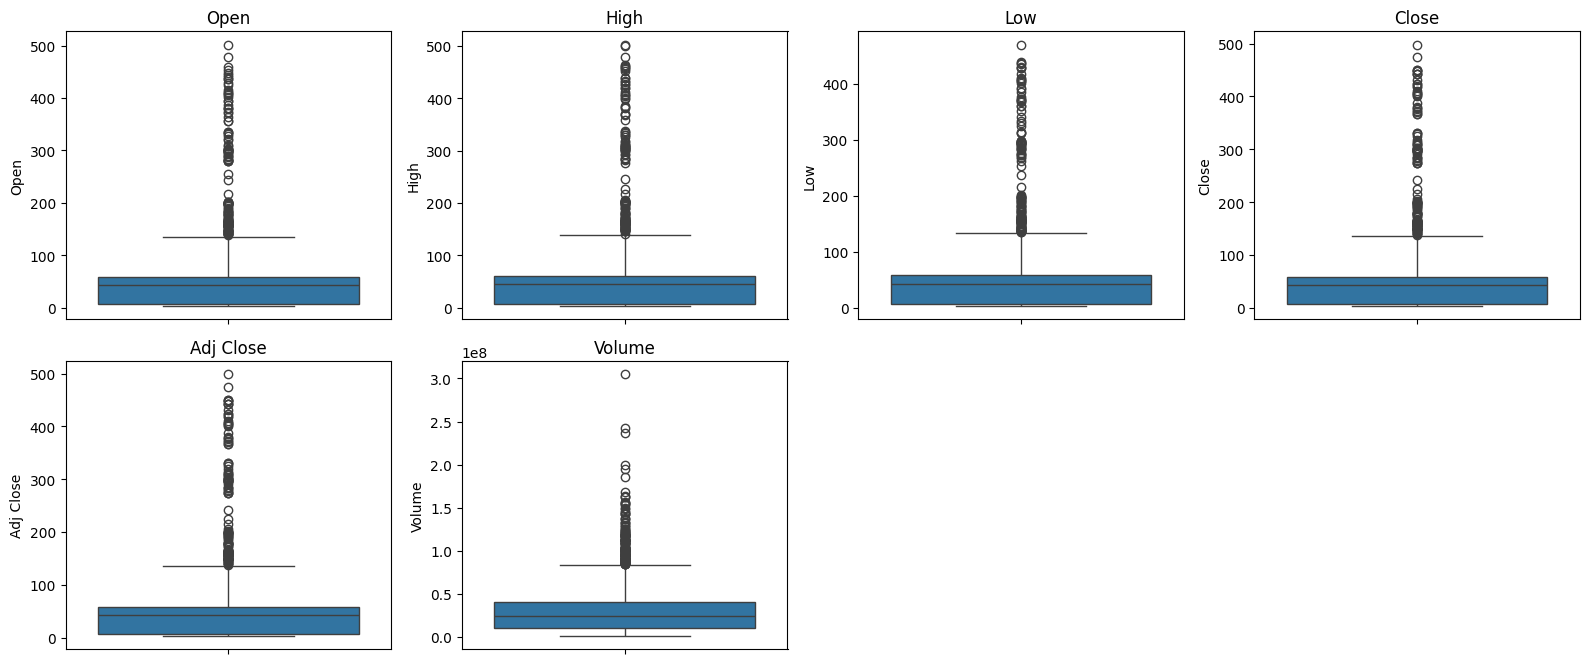

In [ ]:
# cek outlier
plt.figure(figsize=(16, 10))

# Membuat boxplot untuk setiap kolom numerik dalam DataFrame Anda
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

**Output** diatas menunjukkan bahwa terdapat banyak outlier dalam dataset tetapi kami tidak menghapusnya dikarenakan akan kehilangan beberapa data dan informasi

In [ ]:
df = df.rename(columns = {
    'Date' : 'date',
    'Open' : 'open',
    'High' : 'high',
    'Low' : 'low',
    'Close' : 'close',
    'Adj Close' : 'adj_close',
    'Volume' : 'volume'
})
df.head(2)

,date,open,high,low,close,adj_close,volume
0,6/30/2010,5.158,6.084,4.660,4.766,4.766,85935500
1,7/1/2010,5.000,5.184,4.054,4.392,4.392,41094000


Mengganti Nama kolom agar lebih mudah saat pengerjaan

##Exploratory Data Analysis

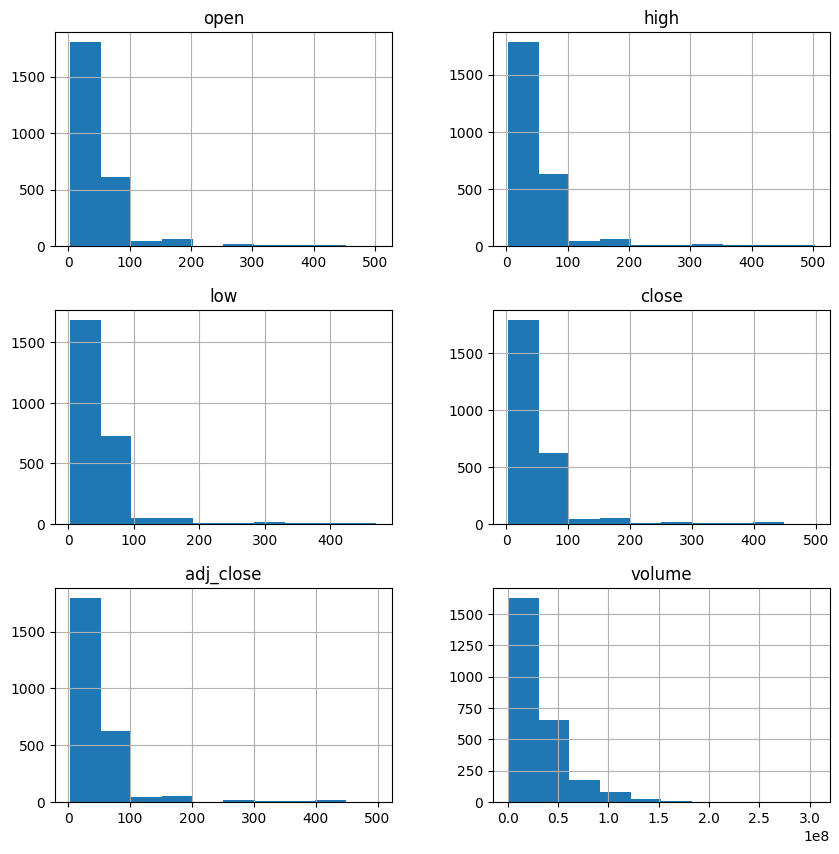

In [ ]:
# Display the histogram
df.hist(figsize=(10, 10))
plt.show()

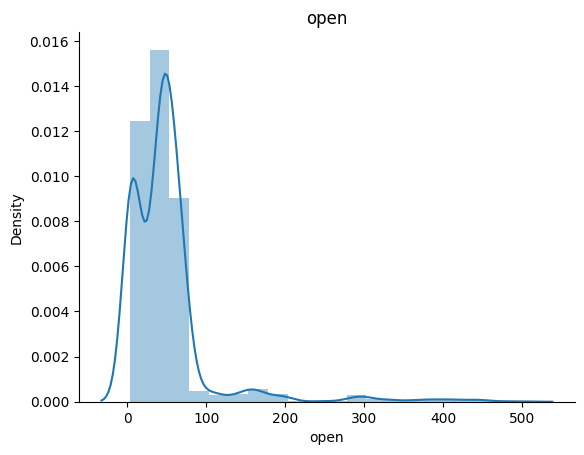

In [ ]:
# Plot the distribution
sns.distplot(df['open'], bins=20)
plt.title('open')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


<Axes: xlabel='open', ylabel='close'>

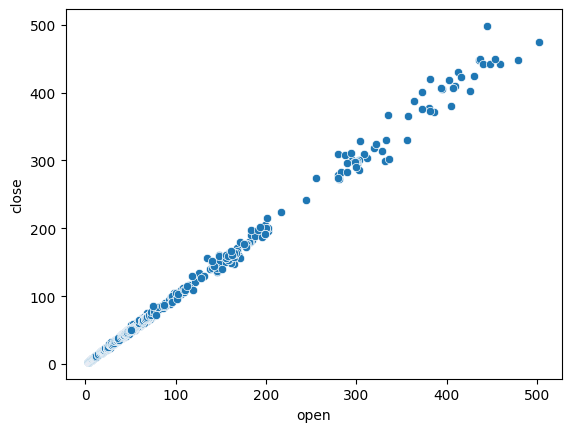

In [ ]:
sns.scatterplot(
    data=df,
    x='open',
    y='close'
)

**Scatter plot** menunjukkan bahwa ada korelasi positif antara harga “open” dan “close”, yang berarti bahwa ketika harga “open” naik, harga “close” cenderung naik juga

In [ ]:
# mau melihat korelasi disetiap kolom
corr = df.corr()
corr

,open,high,low,close,adj_close,volume
open,1.000000,0.999336,0.999139,0.998581,0.998581,0.520234
high,0.999336,1.000000,0.998967,0.999401,0.999401,0.525483
low,0.999139,0.998967,1.000000,0.999197,0.999197,0.516526
close,0.998581,0.999401,0.999197,1.000000,1.000000,0.520347
adj_close,0.998581,0.999401,0.999197,1.000000,1.000000,0.520347
volume,0.520234,0.525483,0.516526,0.520347,0.520347,1.000000


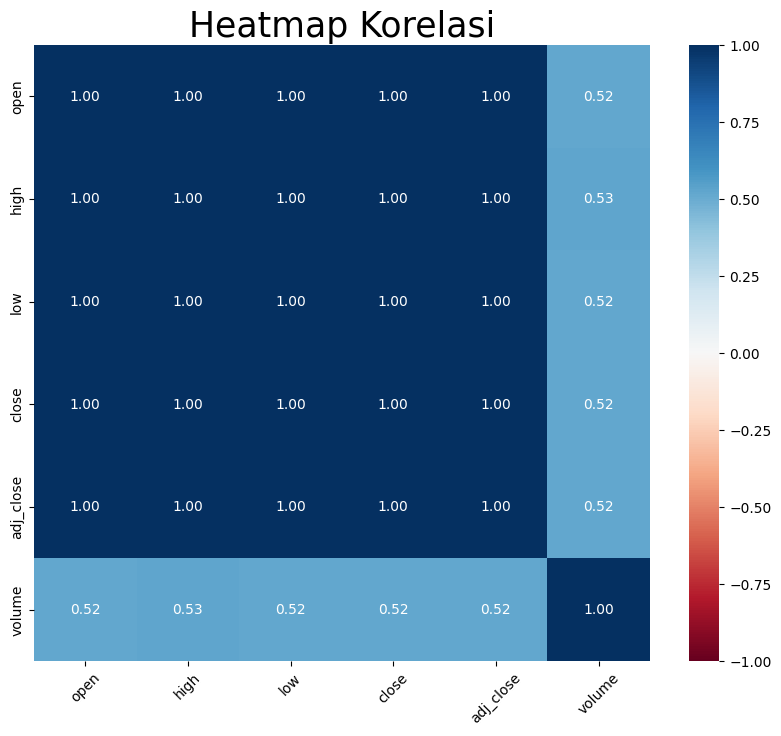

In [ ]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1, square=True)

# Mengatur label sumbu x
plt.xticks(rotation=45)

# Mengatur judul
plt.title('Heatmap Korelasi',size=25)

# Menampilkan plot
plt.show()

**Output** diatas menunjukkan bahwa Variabel-variabel Open, High, Low, Close, dan Adj Close ini memiliki korelasi yang sangat kuat satu sama lain, ditunjukkan dengan warna biru tua. Ini berarti bahwa ketika harga pembukaan (‘open’) naik, harga tertinggi (‘high’), harga terendah (‘low’), harga penutupan (‘close’), dan harga penutupan disesuaikan (‘adj close’) cenderung naik juga.

 Variabel ‘volume’ memiliki korelasi yang lebih lemah dengan variabel lainnya, ditunjukkan dengan warna biru yang lebih muda. Ini berarti bahwa volume perdagangan tidak selalu bergerak seiring dengan perubahan harga.

# Data Prepocessing

## Mengubah tipe data yang tidak sesuai

In [ ]:
#Mengubah tipe data kolom 'Date' menjadi datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

In [ ]:
#Mengubah variabel 'Date' menjadi index
df = df.set_index(["date"])

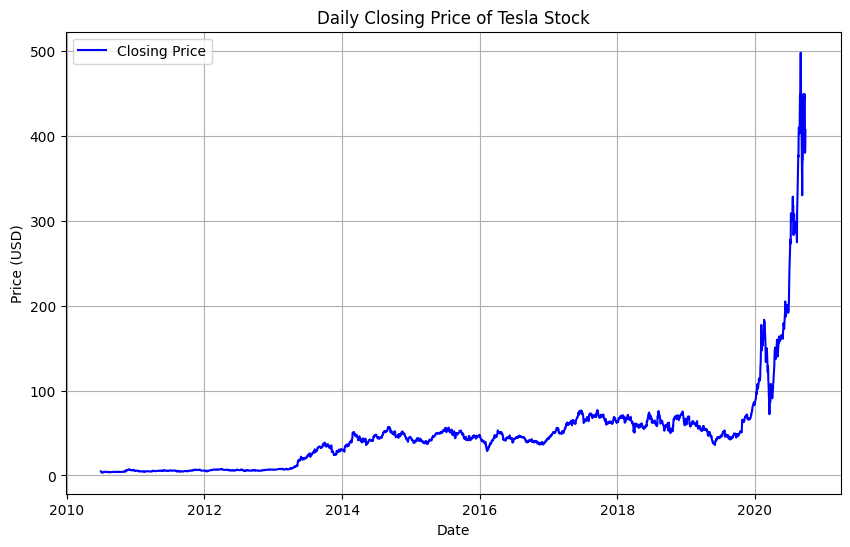

In [ ]:
# Memplot grafik time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], color='blue', label='Closing Price')
plt.title('Daily Closing Price of Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Basic Statistic

In [ ]:
df.describe()

,open,high,low,close,adj_close,volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


# Data Modeling

## Variable Identification

In [ ]:
y = targets = labels = output_var = df["close"]
X = predictors = input_var = df.loc[:,df.columns != "close"]

Pemilihan variabel 'close' sebagai target dikarenakan prediksi harga penutupan dapat memberikan gambaran tentang kinerja saham pada hari tersebut.

In [ ]:
print("Input Variables", list(X.columns))
print("Output Variable", "['close']")

Input Variables ['open', 'high', 'low', 'adj_close', 'volume']
Output Variable ['close']


**Identifikasi Tipe Data Variabel**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2579 entries, 2010-06-30 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2579 non-null   float64
 1   high       2579 non-null   float64
 2   low        2579 non-null   float64
 3   close      2579 non-null   float64
 4   adj_close  2579 non-null   float64
 5   volume     2579 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 141.0 KB


In [ ]:
datatype = df.dtypes
#col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : []
Numerical Columns : ['open', 'high', 'low', 'close', 'adj_close', 'volume']


In [ ]:
df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2063, 5) (516, 5) (2063,) (516,)


##Prediksi X_train

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

print('coefficients:', model.coef_)
print('intercept:', model.intercept_)
print('mean square error (MSE): %.2f'
%mean_squared_error(y_train, y_pred_train))
print('coefficient of determination (R^2): %.2f'
% r2_score(y_train, y_pred_train))

coefficients: [-1.10798520e-14  1.05009504e-14 -2.00112680e-16  1.00000000e+00
 -3.51603376e-17]
intercept: 1.0726139976213744e-09
mean square error (MSE): 0.00
coefficient of determination (R^2): 1.00


##Prediksi X_test

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
print('coefficients:', model.coef_)
print('intercept:', model.intercept_)
print('mean square error (MSE): %.2f'
%mean_squared_error(y_test, y_pred_test))
print('coefficient of determination (R^2): %.2f'
% r2_score(y_test, y_pred_test))

coefficients: [-1.10798520e-14  1.05009504e-14 -2.00112680e-16  1.00000000e+00
 -3.51603376e-17]
intercept: 1.0726139976213744e-09
mean square error (MSE): 0.00
coefficient of determination (R^2): 1.00


# Data Evaluation

In [ ]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

In [ ]:
# Fit a linear regression model to the data
LR = LinearRegression()
LR.fit(X_train,y_train)

# Print the regression coefficients
print("Coefficients:")
print(LR.intercept_, LR.coef_)

# Make a variable predictions
test_pred=LR.predict(X_test)
train_pred=LR.predict(X_train)

# Calculate evaluation metrics ( MAE, MSE, RMSE, R2 Score)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

#Summary
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Coefficients:
1.0726139976213744e-09 [-1.10798520e-14  1.05009504e-14 -2.00112680e-16  1.00000000e+00
 -3.51603376e-17]
Test set evaluation:
_____________________________________
MAE: 7.180771584582444e-10
MSE: 1.0578816632094832e-18
RMSE: 1.0285337443222188e-09
R2 Square 1.0
Train set evaluation:
_____________________________________
MAE: 6.995774195303545e-10
MSE: 9.954471487950419e-19
RMSE: 9.977209774255736e-10
R2 Square 1.0


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.180772e-10,1.057882e-18,1.028534e-09,1.0,1.0


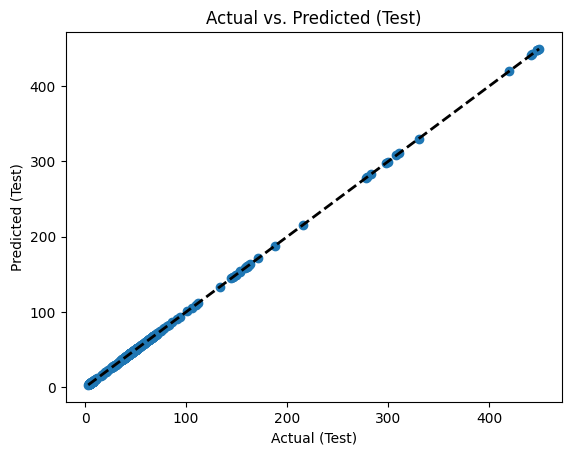

In [ ]:
# Plot data aktual vs. prediksi pada subset data pengujian
plt.scatter(y_test, test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis diagonal y=x
plt.xlabel('Actual (Test)')
plt.ylabel('Predicted (Test)')
plt.title('Actual vs. Predicted (Test)')
plt.show()

In [ ]:
df2 = pd.DataFrame({"Actual": y_test, "Predicted": test_pred})
df2.head(10)

,Actual,Predicted
date,,
2011-07-11,5.670000,5.670000
2015-04-02,38.200001,38.200001
2020-03-05,144.908005,144.908005
2019-11-25,67.267998,67.267998
2012-07-19,6.454000,6.454000
2015-07-30,53.358002,53.358002
2015-05-21,49.124001,49.124001
2015-06-10,50.139999,50.139999
2017-03-08,49.374001,49.374001
